In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [17]:
df = pd.read_csv('D:/Student-Performance-Prediction/data/student-mat.csv',delimiter=';',encoding='ISO-8859-1')
df.columns=df.columns.str.strip()

In [18]:
print("First 5 rows:\n", df.head())
print("\nData Info:\n", df.info())
print("\nMissing values:\n", df.isnull().sum())

First 5 rows:
                                               school  sex  age  address  \
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...  NaN  NaN      NaN   
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...  NaN  NaN      NaN   
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...  NaN  NaN      NaN   
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...  NaN  NaN      NaN   
4  GP;"F";16;"U";"GT3";"T";3;3;"other";"other";"h...  NaN  NaN      NaN   

   famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  famrel  freetime  goout  \
0      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   
1      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   
2      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   
3      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   
4      NaN      NaN   NaN   NaN   NaN   NaN  ...     NaN       NaN    NaN   

   Dalc  Walc  health  absences  G1  G2  G3  
0   NaN   NaN     NaN    

In [19]:
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

In [20]:
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [21]:
df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

In [22]:
X = df.drop('pass', axis=1)
y = df['pass']

In [23]:
features = [
    'sex', 'age', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
    'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic', 'absences'
]
df = df[features + ['pass']]
#print(X.columns.tolist())

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       130

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



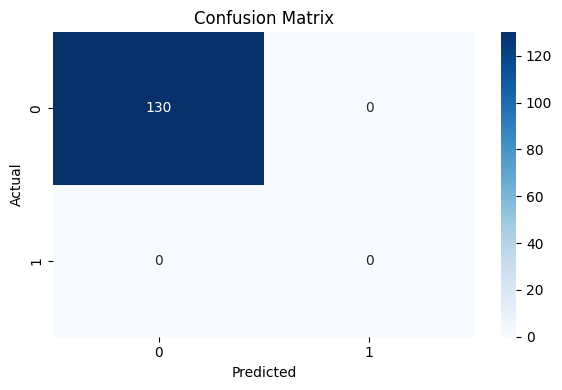

In [27]:
from sklearn.metrics import confusion_matrix

labels = [0, 1]  # 0 = fail, 1 = pass
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

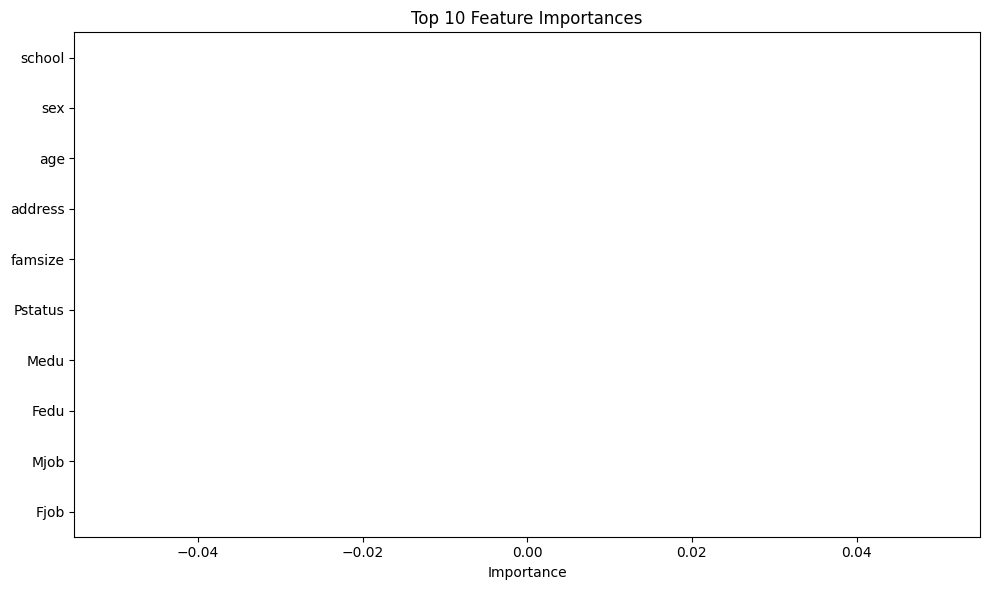

In [28]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feat_imp.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize LabelEncoders for each categorical column
le_sex = LabelEncoder()
le_address = LabelEncoder()
le_Pstatus = LabelEncoder()
le_Mjob = LabelEncoder()
le_Fjob = LabelEncoder()
le_reason = LabelEncoder()
le_guardian = LabelEncoder()
le_schoolsup = LabelEncoder()
le_famsup = LabelEncoder()
le_paid = LabelEncoder()
le_activities = LabelEncoder()
le_nursery = LabelEncoder()
le_higher = LabelEncoder()
le_internet = LabelEncoder()
le_romantic = LabelEncoder()

# Apply encoders to the dataframe
df['sex'] = le_sex.fit_transform(df['sex'])
df['address'] = le_address.fit_transform(df['address'])
df['Pstatus'] = le_Pstatus.fit_transform(df['Pstatus'])
df['Mjob'] = le_Mjob.fit_transform(df['Mjob'])
df['Fjob'] = le_Fjob.fit_transform(df['Fjob'])
df['reason'] = le_reason.fit_transform(df['reason'])
df['guardian'] = le_guardian.fit_transform(df['guardian'])
df['schoolsup'] = le_schoolsup.fit_transform(df['schoolsup'])
df['famsup'] = le_famsup.fit_transform(df['famsup'])
df['paid'] = le_paid.fit_transform(df['paid'])
df['activities'] = le_activities.fit_transform(df['activities'])
df['nursery'] = le_nursery.fit_transform(df['nursery'])
df['higher'] = le_higher.fit_transform(df['higher'])
df['internet'] = le_internet.fit_transform(df['internet'])
df['romantic'] = le_romantic.fit_transform(df['romantic'])

# Save the encoders
joblib.dump(le_sex, 'le_sex.pkl')
joblib.dump(le_address, 'le_address.pkl')
joblib.dump(le_Pstatus, 'le_Pstatus.pkl')
joblib.dump(le_Mjob, 'le_Mjob.pkl')
joblib.dump(le_Fjob, 'le_Fjob.pkl')
joblib.dump(le_reason, 'le_reason.pkl')
joblib.dump(le_guardian, 'le_guardian.pkl')
joblib.dump(le_schoolsup, 'le_schoolsup.pkl')
joblib.dump(le_famsup, 'le_famsup.pkl')
joblib.dump(le_paid, 'le_paid.pkl')
joblib.dump(le_activities, 'le_activities.pkl')
joblib.dump(le_nursery, 'le_nursery.pkl')
joblib.dump(le_higher, 'le_higher.pkl')
joblib.dump(le_internet, 'le_internet.pkl')
joblib.dump(le_romantic, 'le_romantic.pkl')

['le_romantic.pkl']

In [30]:
joblib.dump(model, 'student_performance_model.pkl')
print("Model saved as student_performance_model.pkl")

Model saved as student_performance_model.pkl
